# Basic definitions for NLP
* **Sentence**: a sequence of words. Typically starts with a capitalized word and ends with punctuation.
* **Token**: Token is a generalised term that can design words but also subset of words, etc. Sometimes words are refered to as tokens.
* **Letters and character**: Words are made up of **letters**. **Character** is a more general term that can represent a letter, punctuation, space, etc.
* **Vocabulary**: Set of "all" words, but iun most cases it will simply be a "reasonable" subset of words.
* **Corpus**: Large collection of writings for linguistic analysis.
* **N-Gram**: Sequence of N consecutive items (words, subwords, characters). For example, "I am fine" is a 3-gram (or "trigram").

# Vectors

A vector is a quantity that has a direction and a magnitude. They are a foundation for machine learning.
They give a numerical representation of parts of a text than can be useful of analysis.

For example if can map text into vectors, we can try to organise certain types of texts into categories by representing them into clusters. This can be useful in stuff like spam detection, etc.

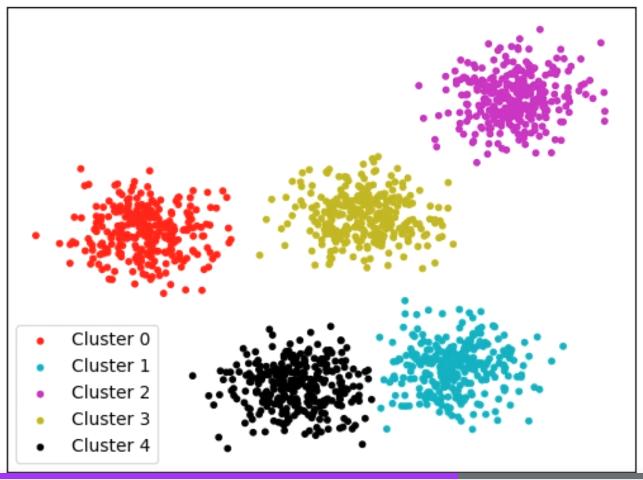



# Bag of Words
This is an approach by which we do not consider the order of words to be important when analysing data.
This has a lot of limitations because we lose information (order of words is often important).
But it is widly used in some models, like vector models, because it can be accurate in some cases.

# Count Vectorizer
"Counting" is the most simple method to convert text into vectors.

**Step 1**: determine V, the vocabulary size in the corpus (i.e. number of unique words)

**Step 2**: convert each document into a vector of size V (i.e. count how many times each word appears in the document, each specific word being a specific "coordinate" of the vector)

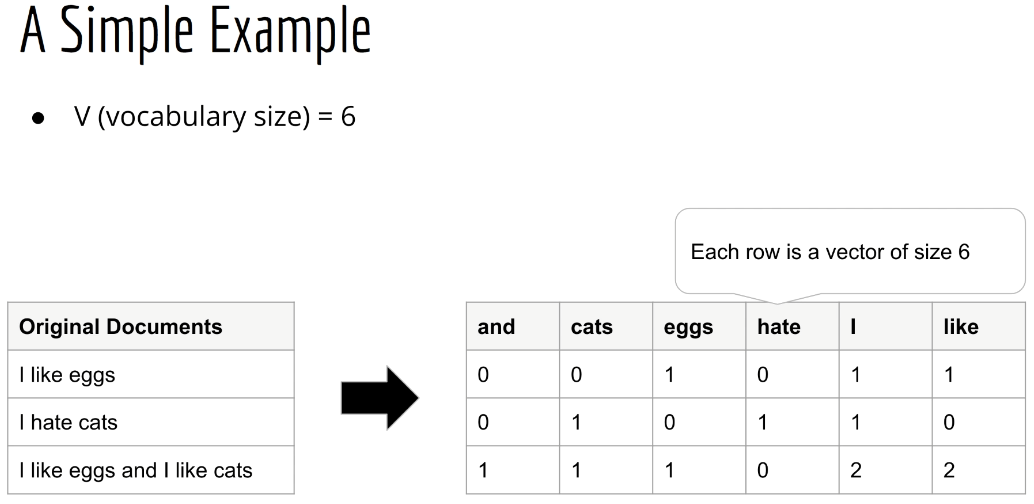


Using these "count vectors" allow to identify or use patterns in specific kinds of texts.

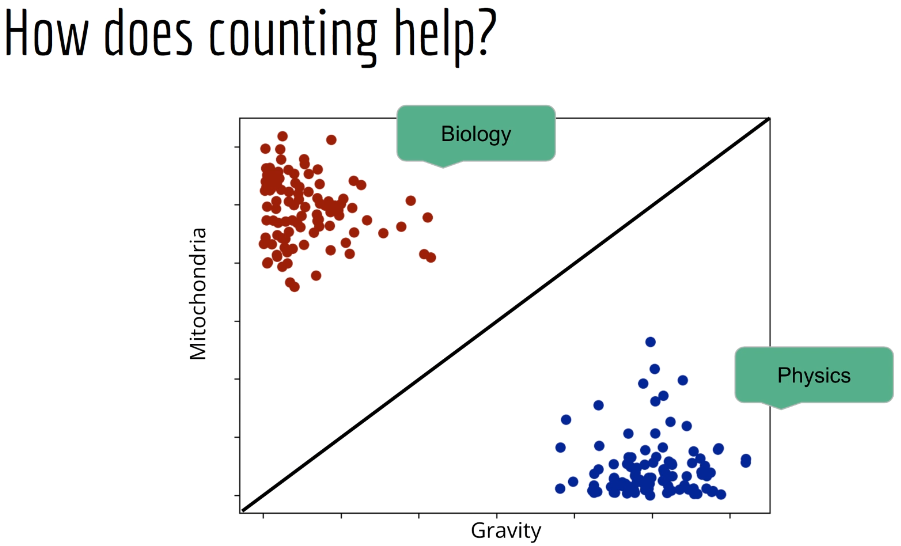


## How to implement the counting method using SciKit-Learn
```python
    vectorizer = CountVectorizer() # initialise a CountVectorizer object
    vectorizer.fit(list_of_documents_train) # fit the CountVectorizer object to the corpus
    train = vectorizer.transform(list_of_documents_train) # transform the test corpus

## The first two lines can be done in a a single line:
    Xtrain = vectorizer.fit_transform(list_of_documents_train)
    Xtest = vectorizer.transform(list_of_documents_train)
```

Let's note that it is useful to normalise vectors in order to be able to compare the documents to one another.

There are two possibilities :

* **Method 1**: Calculate the $L^{2}$-norm

$$\widehat x=\frac{x}{\left \| x \right \|_{2}}, where \left \| x \right \|_{2}=\sqrt{\sum_{i=1}^{V}x{_{i}}^{2}}$$

* **Method 2**: Divide by the sum

$$\widehat x = \frac{x}{\sum_{i=1}^{V}x_{i}}$$


**Note**: It is recommended to use Scipy instead of Numpy, because most vectors will be filled with zeroes (because most documents don't use the entire vocabulary of a language), and Scipy efficiently store the results (sparse matrices).
**Note2**: SciKit-Learn doesn't implement normalisation, but TF-IDF does.

# Tokenisation

Tokenisation consists in spliting the text into tokens/words.

In python, tokenising the text can be as easy as using the `split()` method to obtain a list of strings/tokens. By default it will split on whitespace.

Let's note that "tokenisation" can refer more generaly to more or less refined ways ot spliting the text into elements.

## Punctuation

Sometimes puncuation must be taken into account when tokenizing. For instance, in sentiment analysis ("I hate cats." ≠ "I hate cats?").
By deafault, the CountVectorizer of SciKit-Learn ignores punctuation.

## Casing

We may want a model to be case insensitive.

For that we can simply use `string.lower()`. Otherwise, `CountVectorizer(lowercase=True)` if we use SciKit-Learn.

## Accents

Some words have accents, but in English, the spellings "naïve" and "naive" are equivalent.
It might be useful to map accented characters to the corresponding character. With SciKit-Learn we can use `CountVectorizer(strip_accents=True)`

## Character-based tokenization

It isn't mandatory for tokens to be words. They could simply be characters. They contain a lot less information than words, but the "vocabulary" size is very small and takes little memory.

In SciKit-Learn, if we want Word-based tokenisation:
```python
    CountVectorizer(analyzer="word") # default
```
    
If we want character-based tokenization
```python
    CountVectorizer(analyzer="char")
```

## Subword-based tokenization

Kind of a middle ground between word-based and character-based. Exemple: "walking" = "walk" + "ing".

This allows to avoid treating "work" and "working" like two different words.

# Stopwords

Stopwords are words that wse want to ignore.

This is useful for words that are extremly common but probably don't have much meaning in our model ("a", "the", "is", etc.)

It allows to reduce dimentionality (and therefore less computation).

It also allows to avoid that these words overshadow the counts of more useful words.

SciKit-Learn offers a few options:

```python
    CountVectorizer(stop_words="english")
    CountVectorizer(stop_words=list_of_user_defined_words)
    CountVectorizer(stop_words=None) # default
```
For other languages, we can use the nltk package to get lists of stopwords:
```python
    import nltk
    nltk.download("stopwords") # downloads the stopwords for every language
    from nltk.corpus import stopwords

    stopwords.words("english")
    stopwords.words("german")
```


# Stemming & Lemmatization

In basic tokenisation, variations of a word will all have their own vector component ("walk", "walking", "walks" will be streated as different tokens).
This behaviour is not always desired because it leads to high dimensionality.

A solution consists in converting words to their root.

There are two approches:
* **Stemming** consists in chopping the end of the word. The result may not be a real word. This is a vrey crude technique.
* **Lemmatization** is a more sophisticated approach that uses actual rules of a tanguage, and returns the real root of the words. The "root" is also known as the "lemma", hence "lemmatization".

## Stemming
Crude method based on simple heuristics. For example "if a word ends in 'sses', remove 'es'" (bosses -> boss).
There are various stemming algorithms (like Porter Stemmer in nltk).

```python
    from nltk.stem import PrterStemmer
    porter = PorterStemmer()
    porter.stem("walking") # returns "walk"
```

## Lemmatization
Lemmatization will attemps to find the real lemma of a word. For example, "better" and "best" will become "good". "Was" and "is" will become "be".

Many libraries offer lemmatization (nltk, spacy, etc.)

```python
    import nltk
    nltk.download("wordnet") # this only needs to be done once
    
    from nltk.stem import WordNetLemmatizer
    from nltk.corpus import wordnet
    
    lemmatizer = WordNetLemmatizer()
    lemmatizer.lemmatize("mice") # returns "mouse"
    lemmatizer.lemmatize("going") # returns "going"
    lemmatizer.lemmatize("going", pos=wordnet.VERB) # returns "go"
```
The POS (part of speech) tag can be important because some words can belong to multiple grammar categories.

Let's note that nltk has some quirks regarding POS tags because it mixes different libraries. For example, the tags it returns are not compatible with the WordNet lemmatizer. It is necessary to map the tags from one format to the other.

## Application of Stemming and lemmatization to real-life situations
They are used in search engines, document retriecal, online ads, social media tags...

* In search engines, we don't want to only return exact matches, but relevant results with smilar meanings. So converting words to their root form returns more matches.
* Online advertizing works on keywords. We want ads to be relevant to search queries.

# Stemming and Lemmatization Demo

In [1]:
# Stemming demo

import nltk
from nltk.stem import PorterStemmer  # necessary for stemming

porter = PorterStemmer()

words = ["walking", "walked", "walks", "ran", "running",
         "bosses", "replacement", "unnecessary", "berry"]

for word in words:
    print(f"{word} -> {porter.stem(word)}")

# Note: "unnecessary" will stem to "unnecessari", which is actually not too bad because most of the time we don't want "unnecessary" and "necessary" to be treated the same.


walking -> walk
walked -> walk
walks -> walk
ran -> ran
running -> run
bosses -> boss
replacement -> replac
unnecessary -> unnecessari
berry -> berri


In [2]:
# Stemming an entire sentence

sentence = "Lemmatization is more sophisticated than stemming".split()
for token in sentence:
    print(porter.stem(token), end=" ")


lemmat is more sophist than stem 

In [4]:
# Lemmatization demo

import nltk
nltk.download("wordnet") # database needed to lemmatize. This line only needs to be executed once.

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("walking")  # returns "walking"
lemmatizer.lemmatize("walking", pos=wordnet.VERB)  # returns "walk"

lemmatizer.lemmatize("going")  # returns "going"
lemmatizer.lemmatize("going", pos=wordnet.VERB)  # returns "go"
lemmatizer.lemmatize("ran", pos=wordnet.VERB)  # return "runs"


[nltk_data] Downloading package wordnet to /home/sixsous/nltk_data...


'run'

In [5]:
# Differences stemisation / lemmatization

porter.stem("mice")  # returns "mice"
lemmatizer.lemmatize("mice")  # returns "mouse"

porter.stem("was")  # returns "wa"
lemmatizer.lemmatize("was", pos=wordnet.VERB)  # returns "be"

porter.stem("is")  # returns "is"
lemmatizer.lemmatize("is", pos=wordnet.VERB)  # returns "be"

porter.stem("better")  # returns "better"
lemmatizer.lemmatize("better", pos=wordnet.ADJ)  # returns "good"


'good'

In [6]:
# Lemmatization seems limited because we need the part of speech
# But we can do POS tagging to obtain these parts of speech, and that functionality is included in nltk
# Unfortunetly, the lemmatizer and the POS Tagger aren't compatible so we need to create a mapping function :

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


In [7]:
# We will have to download the appropriate package for the POS Tagger:
import nltk
nltk.download("averaged_perceptron_tagger") # Only needs to be done once

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/sixsous/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [8]:
from pprint import pprint

# We can now automatically get the POS for each part of a sentence, and use it to properly lemmatize every word.

sentence = "I know many children ask for a pony, but I wanted a bicycle with rockets strapped to it.".split()
words_and_tags = nltk.pos_tag(sentence)
pprint(words_and_tags)

for word, tag in words_and_tags:
    lemma = lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag))
    print(lemma, end=" ")


[('I', 'PRP'),
 ('know', 'VBP'),
 ('many', 'JJ'),
 ('children', 'NNS'),
 ('ask', 'VBP'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('pony,', 'NN'),
 ('but', 'CC'),
 ('I', 'PRP'),
 ('wanted', 'VBD'),
 ('a', 'DT'),
 ('bicycle', 'NN'),
 ('with', 'IN'),
 ('rockets', 'NNS'),
 ('strapped', 'VBN'),
 ('to', 'TO'),
 ('it.', 'VB')]
I know many child ask for a pony, but I want a bicycle with rocket strap to it. 

In [9]:
# Another example of POS Tagger + Lemmatization:

sentence = "The cat was following the bird as it flew by".split()
words_and_tags = nltk.pos_tag(sentence)
pprint(words_and_tags)

for word, tag in words_and_tags:
    lemma = lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag))
    print(lemma, end=" ")


[('The', 'DT'),
 ('cat', 'NN'),
 ('was', 'VBD'),
 ('following', 'VBG'),
 ('the', 'DT'),
 ('bird', 'NN'),
 ('as', 'IN'),
 ('it', 'PRP'),
 ('flew', 'VBD'),
 ('by', 'IN')]
The cat be follow the bird a it fly by 

# Count Vectorizer (code)

In [13]:
# List of imports needed

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [14]:
# Downloads needed from nltk (only need to be run once)
import nltk
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /home/sixsous/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/sixsous/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/sixsous/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /home/sixsous/nltk_data...


True

In [16]:
# This is a dataset containing a sample of BBC news, categorised into sections.
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2023-02-05 01:28:18--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 2606:4700:3030::ac43:d5a6, 2606:4700:3031::6815:17d2, 104.21.23.210, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|2606:4700:3030::ac43:d5a6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M   584KB/s    in 8.6s    

2023-02-05 01:28:28 (579 KB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [17]:
# We'll use pandas to read the csv dataset

df = pd.read_csv('bbc_text_cls.csv')
df.head() # to look what the data looks like

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


Matplotlib is building the font cache; this may take a moment.


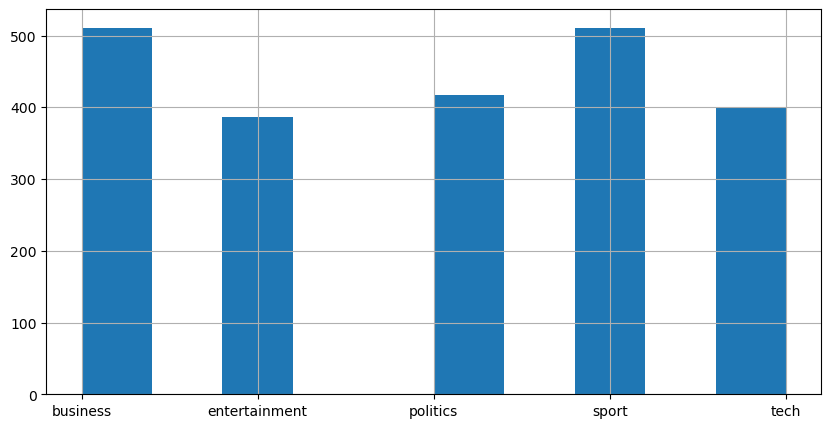

In [18]:
# As we see, the data is already divided in labels

# Let's asign the data to variables.
inputs = df['text']
labels = df['labels']

# And display a histogram. This is to check if we have imbalanced classes or not (if we have classes over or under represented).
labels.hist(figsize=(10, 5));

In [19]:
# There doesn't seem to be imbalanced classes, the data seems evely spread out.

# We do a train test split. This must be done before vectorizing.
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(
    inputs, labels, random_state=123)

vectorizer = CountVectorizer()
# We fit transform the model inputs
Xtrain = vectorizer.fit_transform(inputs_train) # Train data => what we have when we build our model
Xtest = vectorizer.transform(inputs_test) # Test data => What we have when we apply our model

In [20]:
# The data has been converted to vectors.
Xtrain

<1668x26287 sparse matrix of type '<class 'numpy.int64'>'
	with 337411 stored elements in Compressed Sparse Row format>

In [21]:
# Note that this is a sparse matrix of integers. This is efficient for big matrices, when a large part isn't used (zeroes).
#
# Let's have a look at it to see if this datatype is fine.

# How many non-zero elements do we have ?
(Xtrain != 0).sum()

337411

In [22]:
# what percentage of values are non-zero?
(Xtrain != 0).sum() / np.prod(Xtrain.shape) # Xtrain.shape is a tuple containing le number of rows and commons. The product is of course the number of elements in the matrix. 

0.007695239935415004

In [23]:
# 0.7% of the matrix doesn't contain zeroes.
# A very small percentage of the matrix is actually used => using a spare matrix does make a lot of sense.

model = MultinomialNB() # we crate an instance of our model
model.fit(Xtrain, Ytrain) # we fit the model on the train set
# We test the efficiency of the model
print("train score:", model.score(Xtrain, Ytrain)) 
print("test score:", model.score(Xtest, Ytest))

train score: 0.9922062350119905
test score: 0.9712746858168761


In [24]:
# The scores aren't bad. Let's check if we can get better scores.

# Using stopwords
vectorizer = CountVectorizer(stop_words='english')
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9928057553956835
test score: 0.9766606822262118


In [25]:
# The results are barely better

# Let's try with Lemmatization

# For that we need a mapping function for POS tagging
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# This wil tokenise and lemmatize each word of each document.
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()

    def __call__(self, doc):
        tokens = word_tokenize(doc) # converts the document to tokens
        words_and_tags = nltk.pos_tag(tokens) # obtains the POS tags
        # loop through each word/tag pair and call the lemmatiser function
        return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_and_tags] 


# with lemmatization
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer()) # this can take any callable, including a function if we are more comfortable with it
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

/home/sixsous/.local/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9922062350119905
test score: 0.9676840215439856


In [26]:
# Interestingy, this performs worse
# Also, the process takes a lot more time

# Now let's try Stemming

class StemTokenizer:
    def __init__(self):
        self.porter = PorterStemmer()

    def __call__(self, doc):
        tokens = word_tokenize(doc)
        return [self.porter.stem(t) for t in tokens]


vectorizer = CountVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

/home/sixsous/.local/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9892086330935251
test score: 0.9694793536804309


In [27]:
# The train score is worse, but the test score is better.
# However it performs still worse than when we experimented with non-tokenising methods.

# We will now try with the simplest of tokenisers : the split function

def simple_tokenizer(s):
    return s.split()

vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))


/home/sixsous/.local/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9952038369304557
test score: 0.9712746858168761


In [ ]:
# The train score has increased, while the test score is similar to our first tests.

# This should illustrate that it isn't always clear which method will perform best until we actually try.
# Here, the most complexe method, lemmatization, lead to the worst performance, as well as the longest execution